<a href="https://colab.research.google.com/github/ttury/Do_It_For_Deep-Learning/blob/main/Validation_Set%26Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [3]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', random_state = 42) # loss와 같이 사용자가 선택해야 하는 매개변수를 하이퍼파라미터라고 함
sgd.fit(x_train_all, y_train_all)
print(sgd.score(x_test, y_test))

0.8333333333333334


In [4]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'hinge', random_state = 42) # SGDClassifier 클래스의 매개변수를 바꿔보기 -> '모델을 튜닝한다'
sgd.fit(x_train_all, y_train_all)
print(sgd.score(x_test, y_test))

0.9385964912280702


In [5]:
# validation set(검증 세트)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

print(len(x_train), len(x_val)) # train : val : test = 64 : 16 : 20

364 91


In [6]:
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train, y_train)
print(sgd.score(x_val, y_val))
'''
훈련 세트의 양이 너무 적어 오히려 성능이 낮아짐
데이터 양이 너무 적은 경우에는 교차 검증을 사용하기도 함
검증과 테스트 세트의 샘플 수를 만개 이상 확보할 수 있다면 나머지는 훈련 세트에 할당
'''

0.6923076923076923


'\n훈련 세트의 양이 너무 적어 오히려 성능이 낮아짐\n데이터 양이 너무 적은 경우에는 교차 검증을 사용하기도 함\n검증과 테스트 세트의 샘플 수를 만개 이상 확보할 수 있다면 나머지는 훈련 세트에 할당\n'

['mean perimeter' 'mean area']


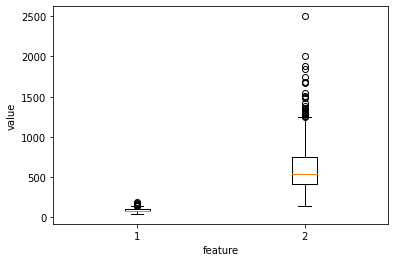

In [7]:
# data scale

import matplotlib.pyplot as plt
import numpy as np

print(cancer.feature_names[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [8]:
class SingleLayer:

  def __init__(self, _learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses = list() # 에포크마다 손실 함수 평균값
    self.w_history = list() # 가중치의 변화 과정 저장
    self.learning_rate = _learning_rate # 학습률 : 하이퍼마라미터, 가중치의 업데이트 양 조절

  def forpass(self, x_i):
    z = np.sum(self.w * x_i) + self.b # 하나의 값
    return z

  def backprop(self, x_i, err):
    w_grad = x_i * err # 다차원 벡터
    b_grad = 1 * err # 하나의 값
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None) # 최솟값 -100, 최댓값 x
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 열 개수(특성 개수)
    self.b = 0
    self.w_history.append(self.w.copy()) # ndarray를 복사할때 = 사용 x, copy 함수 사용
    np.random.seed(42)

    for _ in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      '''
      에포크마다 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄임
      arrange 함수 : 0 부터 len(x) - 1까지 1씩 커지는 array 생성
      permutation 함수 : array를 무작위로 섞음(실제 array 값에는 변화 없음)
      '''

      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)

        self.w -= w_grad * self.learning_rate
        self.b -= b_grad
        self.w_history.append(self.w.copy()) # 변화한 가중치 기록

        a = np.clip(a, 1e-10, 1-1e-10) # (10의 -10승) ~ (1 - 10의 -10승) 범위
        logistic_loss = -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a)) # 로지스틱 손실 함수 값 구하기
        loss += logistic_loss

      self.losses.append(loss/len(y)) # 손실 함수의 결과값을 샘플 개수로 나누어 평균값 구하기

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 다차원 벡터
    return np.array(z) > 0 # 다차원 벡터
    '''
    시그모이드 출력값의 판단 기준은 0.5이다.
    z가 0보다 크면 a가 0.5보다 크고 a가 0보다 작으면 a가 0.5보다 작아지기 때문에
    predict 함수에서는 굳이 시그모이드 함수를 사용할 필요가 없이 z만으로 비교한다.
    '''
    
  def score(self, x, y):
    return np.mean(self.predict(x) == y) # 정확도 계산
  
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
print(layer1.score(x_val, y_val))

0.9120879120879121


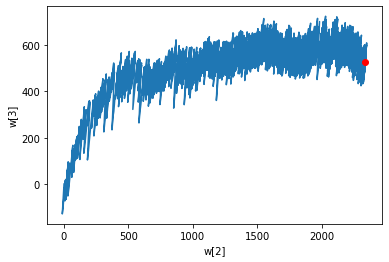

In [9]:
w2 = list()
w3 = list()

for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

# w3에 대한 그레디언트가 크기 때문에 w3축을 따라 가중치가 크게 요동치고 있다

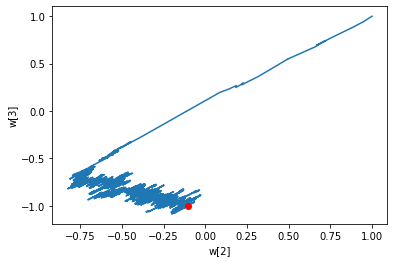

0.37362637362637363


In [10]:
# scale standardization

train_mean = np.mean(x_train, axis = 0) # axis = 0 : 2차원 배열의 열을 기준으로 계산 -> 1행 벡터로 만듬
train_std = np.std(x_train, axis = 0)
x_train_scaled = (x_train - train_mean) / train_std

layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = list()
w3 = list()
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

plt.show()
print(layer2.score(x_val, y_val))
# w2와 w3의 변화 비율이 비슷하기 때문에 대각선 방향으로 가중치 이동
# 검증 세트의 스케일을 바꾸지 않았기 때문에 성능이 좋지 않음

In [12]:
val_mean = np.mean(x_val, axis = 0)
val_std = np.std(x_val, axis = 0)
x_val_scaled = (x_val - val_mean) / val_std

print(layer2.score(x_val_scaled, y_val))

0.967032967032967


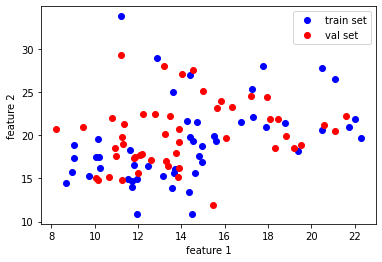

In [13]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

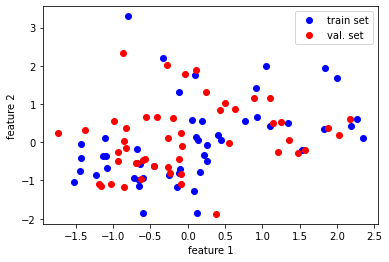

'\n훈련 세트와 검증 세트가 서로 다른 비율로 조정되어 \n점과 점 사이의 거리가 변환된 이후에 유지되지 못함\n'

In [15]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

'''
훈련 세트와 검증 세트가 서로 다른 비율로 조정되어 
점과 점 사이의 거리가 변환된 이후에 유지되지 못함
'''

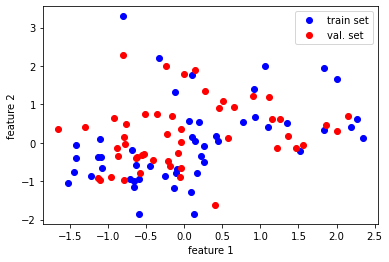

'\n훈련 세트의 평균, 표준 편차르 사용하여 검증 세트를 변환\n검증 세트와 훈련 세트가 동일한 비율로 변환됨\n'

In [19]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

'''
훈련 세트의 평균, 표준 편차르 사용하여 검증 세트를 변환
검증 세트와 훈련 세트가 동일한 비율로 변환됨
'''

In [21]:
print(layer2.score(x_val_scaled, y_val))
# 검증 세트가 클 경우 성능에 차이가 나타날 수 있다고 한다

0.967032967032967
